In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
#warnings.filterwarnings('ignore')

In [11]:
#set path to project folder
import sys
sys.path.append('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2')

In [3]:
# Import the required functions or classes from the module
from src.data.datapreprocess import DataProcessor

# Create an instance of the DataProcessor class
data_processor = DataProcessor()


In [4]:
# Load the data
sales_data = pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/sales_train.csv')

price_data = pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/items_weekly_sell_prices.csv')

dates_data =  pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/calendar.csv')

events_data = pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/calendar_events.csv')


In [5]:
#explore the sales_data
data_processor.explore_data(sales_data)

First 5 rows:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1532  d_1533  d_1534  d_1535  d_1536  \
0       CA    0    0    0    0  ...       1       1       1       0       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       0       0       1       0       0   
3       CA    0    0    0    0  ...       8       2       0       8       2   
4       CA    0    0    0    0  ...       2       0       1       3       2   

   d_1537  d_1538  d_1539  d_1

In [6]:
#explore the price_data
data_processor.explore_data(price_data)

First 5 rows:
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

Last 5 rows:
        store_id      item_id  wm_yr_wk  sell_price
6841116     WI_3  FOODS_3_827     11617         1.0
6841117     WI_3  FOODS_3_827     11618         1.0
6841118     WI_3  FOODS_3_827     11619         1.0
6841119     WI_3  FOODS_3_827     11620         1.0
6841120     WI_3  FOODS_3_827     11621         1.0

Descriptive statistics:
           wm_yr_wk    sell_price
count  6.841121e+06  6.841121e+06
mean   1.138294e+04  4.410952e+00
std    1.486100e+02  3.408814e+00
min    1.110100e+04  1.000000e-02
25%    1.124700e+04  2.180000e+00
50%    1.141100e+04  3.470000e+00
75%    1.151700e+04  5.840000e+00
max    1.162100e+04  1.073200e+02

Info:
<class 'pandas.core.frame.DataFram

In [7]:
#explore the dates_data
data_processor.explore_data(dates_data)

First 5 rows:
         date  wm_yr_wk    d
0  2011-01-29     11101  d_1
1  2011-01-30     11101  d_2
2  2011-01-31     11101  d_3
3  2011-02-01     11101  d_4
4  2011-02-02     11101  d_5

Last 5 rows:
            date  wm_yr_wk       d
1964  2016-06-15     11620  d_1965
1965  2016-06-16     11620  d_1966
1966  2016-06-17     11620  d_1967
1967  2016-06-18     11621  d_1968
1968  2016-06-19     11621  d_1969

Descriptive statistics:
           wm_yr_wk
count   1969.000000
mean   11347.086338
std      155.277043
min    11101.000000
25%    11219.000000
50%    11337.000000
75%    11502.000000
max    11621.000000

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1969 non-null   object
 1   wm_yr_wk  1969 non-null   int64 
 2   d         1969 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.3+ KB
None

Shape:
(1969, 3)


In [11]:
#explore the events_data
data_processor.explore_data(events_data)

First 5 rows:
         date     event_name event_type
0  2011-02-06      SuperBowl   Sporting
1  2011-02-14  ValentinesDay   Cultural
2  2011-02-21  PresidentsDay   National
3  2011-03-09      LentStart  Religious
4  2011-03-16      LentWeek2  Religious

Last 5 rows:
           date      event_name event_type
162  2016-05-30     MemorialDay   National
163  2016-06-02  NBAFinalsStart   Sporting
164  2016-06-07  Ramadan starts  Religious
165  2016-06-19    Father's day   Cultural
166  2016-06-19    NBAFinalsEnd   Sporting

Descriptive statistics:
              date event_name event_type
count          167        167        167
unique         162         30          4
top     2016-06-19  SuperBowl  Religious
freq             2          6         56

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        167 non-null    object
 1   event_na

In [14]:
# Specify the columns to melt from df_stores_train
 # Select columns having days as d_num
dept_sales = sales_data.columns[6:] 

In [15]:
sales_data=pd.melt(sales_data, id_vars=['store_id','cat_id', 'item_id'], value_vars= dept_sales,
        var_name='Day',value_name='Sales')

In [16]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46985090 entries, 0 to 46985089
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   store_id  object
 1   cat_id    object
 2   item_id   object
 3   Day       object
 4   Sales     int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ GB


In [17]:
# Convert the 'date' column to datetime data type
dates_data['date'] = pd.to_datetime(dates_data['date'])


In [19]:
# left join on sales_data and dates_data on column 'Day'
df_stores_data = pd.merge(sales_data, dates_data[['d', 'date', 'wm_yr_wk']], left_on='Day', right_on='d', how='left')

In [20]:
#define cols to drop
to_drop = ['d', 'Day']

#deleting defined columns
df_stores_data.drop(columns=to_drop, axis=1, inplace=True)


In [21]:
# shows first 5 rows from df_stores_data
df_stores_data.head()

,store_id,cat_id,item_id,Sales,date,wm_yr_wk
0,CA_1,HOBBIES,HOBBIES_1_001,0,2011-01-29,11101
1,CA_1,HOBBIES,HOBBIES_1_002,0,2011-01-29,11101
2,CA_1,HOBBIES,HOBBIES_1_003,0,2011-01-29,11101
3,CA_1,HOBBIES,HOBBIES_1_004,0,2011-01-29,11101
4,CA_1,HOBBIES,HOBBIES_1_005,0,2011-01-29,11101


In [27]:
# Merge df1 and df2 on common columns
total= df_stores_data.merge(price_data, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

# Calculate revenue by multiplying Sales and sell_price
total['revenue'] = total['Sales'] * total['sell_price']

# Group by 'item_id' and 'wm_yr_wk' and aggregate to calculate weekly revenue
#result_df = total.groupby(['store_id', 'item_id', 'wm_yr_wk', 'date']).agg({'revenue': 'sum'})

In [28]:
#shape of merged df
total.shape

(46985090, 8)

In [29]:
# shows 1st five rows from total
total.head()

,store_id,cat_id,item_id,Sales,date,wm_yr_wk,sell_price,revenue
0,CA_1,HOBBIES,HOBBIES_1_001,0,2011-01-29,11101,NaN,NaN
1,CA_1,HOBBIES,HOBBIES_1_002,0,2011-01-29,11101,NaN,NaN
2,CA_1,HOBBIES,HOBBIES_1_003,0,2011-01-29,11101,NaN,NaN
3,CA_1,HOBBIES,HOBBIES_1_004,0,2011-01-29,11101,NaN,NaN
4,CA_1,HOBBIES,HOBBIES_1_005,0,2011-01-29,11101,NaN,NaN


In [30]:
df_total = total.copy()

In [31]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46985090 entries, 0 to 46985089
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   store_id    object        
 1   cat_id      object        
 2   item_id     object        
 3   Sales       int64         
 4   date        datetime64[ns]
 5   wm_yr_wk    int64         
 6   sell_price  float64       
 7   revenue     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.2+ GB


In [32]:
# Convert 'date' columns to datetime format in both dataframes
events_data['date'] = pd.to_datetime(events_data['date'])


In [33]:
# Merge events_df with total_df based on the 'date' column
df_final = df_total.merge(events_data, on='date', how='left')

# Create a new column 'event' where 'yes' indicates an event and 'no' indicates no event
df_final['event'] = df_final['event_name'].apply(lambda x: 'yes' if not pd.isna(x) else 'no')

In [34]:
df_final.head()

,store_id,cat_id,item_id,Sales,date,wm_yr_wk,sell_price,revenue,event_name,event_type,event
0,CA_1,HOBBIES,HOBBIES_1_001,0,2011-01-29,11101,NaN,NaN,NaN,NaN,no
1,CA_1,HOBBIES,HOBBIES_1_002,0,2011-01-29,11101,NaN,NaN,NaN,NaN,no
2,CA_1,HOBBIES,HOBBIES_1_003,0,2011-01-29,11101,NaN,NaN,NaN,NaN,no
3,CA_1,HOBBIES,HOBBIES_1_004,0,2011-01-29,11101,NaN,NaN,NaN,NaN,no
4,CA_1,HOBBIES,HOBBIES_1_005,0,2011-01-29,11101,NaN,NaN,NaN,NaN,no


In [35]:
df_final.shape

(47107050, 11)

In [36]:
#explore the training data
data_processor.explore_data(df_final)

First 5 rows:
  store_id   cat_id        item_id  Sales       date  wm_yr_wk  sell_price  \
0     CA_1  HOBBIES  HOBBIES_1_001      0 2011-01-29     11101         NaN   
1     CA_1  HOBBIES  HOBBIES_1_002      0 2011-01-29     11101         NaN   
2     CA_1  HOBBIES  HOBBIES_1_003      0 2011-01-29     11101         NaN   
3     CA_1  HOBBIES  HOBBIES_1_004      0 2011-01-29     11101         NaN   
4     CA_1  HOBBIES  HOBBIES_1_005      0 2011-01-29     11101         NaN   

   revenue event_name event_type event  
0      NaN        NaN        NaN    no  
1      NaN        NaN        NaN    no  
2      NaN        NaN        NaN    no  
3      NaN        NaN        NaN    no  
4      NaN        NaN        NaN    no  

Last 5 rows:
         store_id cat_id      item_id  Sales       date  wm_yr_wk  sell_price  \
47107045     WI_3  FOODS  FOODS_3_823      2 2015-04-18     11512        2.88   
47107046     WI_3  FOODS  FOODS_3_824      0 2015-04-18     11512        2.00   
47107047     W

In [42]:
#explore the training data
data_processor.explore_data(df_final)

First 5 rows:
  store_id   cat_id        item_id  Sales       date  wm_yr_wk  sell_price  \
0     CA_1  HOBBIES  HOBBIES_1_001      0 2011-01-29     11101         NaN   
1     CA_1  HOBBIES  HOBBIES_1_002      0 2011-01-29     11101         NaN   
2     CA_1  HOBBIES  HOBBIES_1_003      0 2011-01-29     11101         NaN   
3     CA_1  HOBBIES  HOBBIES_1_004      0 2011-01-29     11101         NaN   
4     CA_1  HOBBIES  HOBBIES_1_005      0 2011-01-29     11101         NaN   

   revenue event_name event_type event  
0      NaN        NaN        NaN    no  
1      NaN        NaN        NaN    no  
2      NaN        NaN        NaN    no  
3      NaN        NaN        NaN    no  
4      NaN        NaN        NaN    no  

Last 5 rows:
         store_id cat_id      item_id  Sales       date  wm_yr_wk  sell_price  \
47107045     WI_3  FOODS  FOODS_3_823      2 2015-04-18     11512        2.88   
47107046     WI_3  FOODS  FOODS_3_824      0 2015-04-18     11512        2.00   
47107047     W

In [60]:

# Define a function to calculate the duration of a dataset based on the 'date' column
def dataset_duration(data):
    # Convert the 'date' column to datetime format
    data.date = pd.to_datetime(data.date)
    
    # Calculate the difference between the maximum and minimum dates in days
    total_days = data.date.max() - data.date.min()
    
    # Calculate the number of years by dividing days by 365
    total_years = total_days.days / 365
    
    # Print the duration in days and years
    print(total_days.days, 'days')
    print(total_years, 'years')

# Call the function to calculate and print the duration of the dataset in df_total
dataset_duration(df_total)


1540 days
4.219178082191781 years


In [61]:
df_final.isnull().sum()

store_id             0
cat_id               0
item_id              0
Sales                0
date                 0
wm_yr_wk             0
sell_price    12291876
revenue       12291876
event_name    43143350
event_type    43143350
event                0
dtype: int64

In [68]:
# substitute nan with 0
df_final['sell_price'].fillna(0, inplace=True)
df_final['revenue'].fillna(0, inplace=True)


In [63]:
# removing columns
df_final.drop(['event_name', 'event_type'], axis=1, inplace=True)


In [65]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47107050 entries, 0 to 47107049
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   store_id    object        
 1   cat_id      object        
 2   item_id     object        
 3   Sales       int64         
 4   date        datetime64[ns]
 5   wm_yr_wk    int64         
 6   sell_price  float64       
 7   revenue     float64       
 8   event       object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.5+ GB


In [69]:
#checking for null values
df_final.isnull().sum()

store_id      0
cat_id        0
item_id       0
Sales         0
date          0
wm_yr_wk      0
sell_price    0
revenue       0
event         0
dtype: int64

In [109]:
# save the DataFrame to a file named "final_merged.csv"
df_final.to_csv('final_merged.csv', index=False)


In [3]:
# read from final merged dataset
df_final = pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/interim/final_merged.csv')


In [4]:
# make a copy of df_final
df_revenue_data = df_final.copy()

In [5]:
df_revenue_data.head()

,store_id,cat_id,item_id,Sales,date,wm_yr_wk,sell_price,revenue,event
0,CA_1,HOBBIES,HOBBIES_1_001,0,2011-01-29,11101,0.0,0.0,no
1,CA_1,HOBBIES,HOBBIES_1_002,0,2011-01-29,11101,0.0,0.0,no
2,CA_1,HOBBIES,HOBBIES_1_003,0,2011-01-29,11101,0.0,0.0,no
3,CA_1,HOBBIES,HOBBIES_1_004,0,2011-01-29,11101,0.0,0.0,no
4,CA_1,HOBBIES,HOBBIES_1_005,0,2011-01-29,11101,0.0,0.0,no


## Visualizations

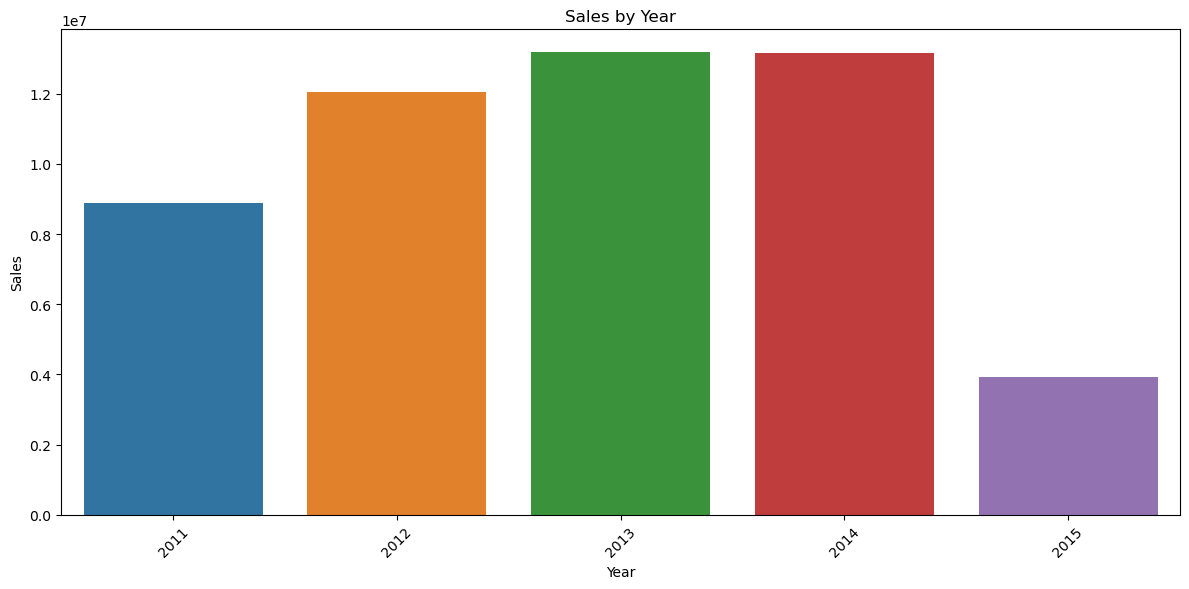

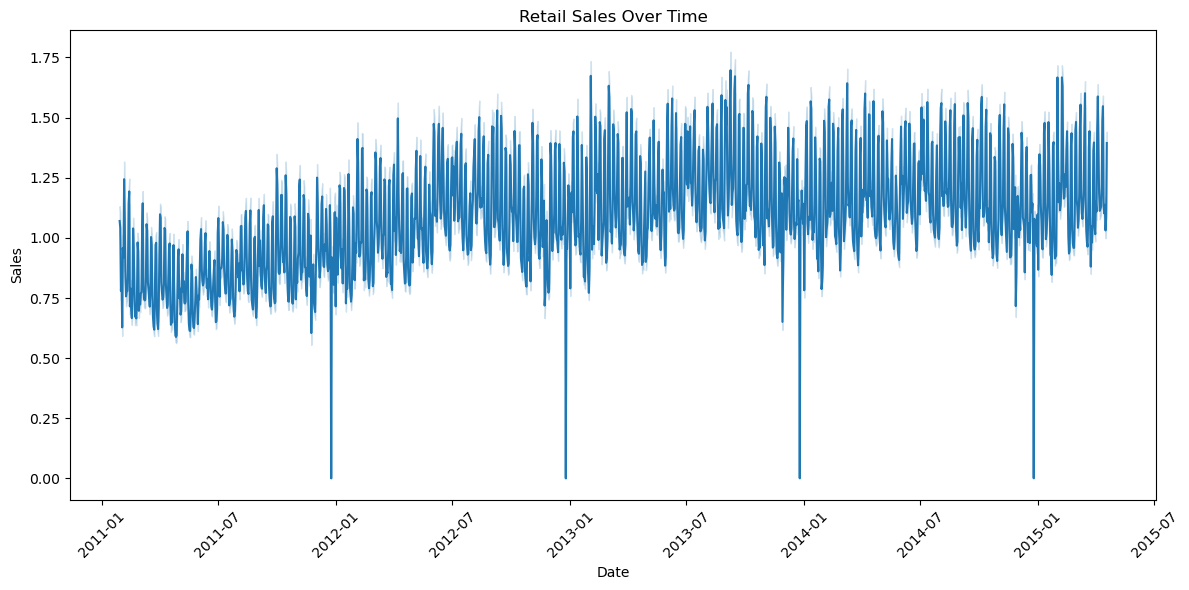

In [38]:
# Import the 'visualize_data' function from the 'src.visualization.visualize' module
from src.visualization.visualize import visualize_data

# Call the 'visualize_data' function with the 'df_train' DataFrame as input
visualize_data(df_revenue_data)


## Data Spitting

In [14]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

X = df_revenue_data.drop('revenue', axis=1)
y = df_revenue_data['revenue']

In [15]:
# Split the features and target variable into 2 different sets (training and validation) with 70-30 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=40, shuffle = 'false')

### Training set

In [16]:
import pandas as pd

# Convert the 'date' column to datetime
X_train['date'] = pd.to_datetime(X_train['date'])

# Extract day, month, day of the week, and year into separate columns
X_train['day'] = X_train['date'].dt.day
X_train['month'] = X_train['date'].dt.month
X_train['day_of_week'] = X_train['date'].dt.day_name()
X_train['year'] = X_train['date'].dt.year


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32974935 entries, 1311972 to 6171974
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   store_id     object        
 1   cat_id       object        
 2   item_id      object        
 3   Sales        int64         
 4   date         datetime64[ns]
 5   wm_yr_wk     int64         
 6   sell_price   float64       
 7   event        object        
 8   day          int64         
 9   month        int64         
 10  day_of_week  object        
 11  year         int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 3.2+ GB


In [18]:
# List of columns to drop
cols_to_drop = ['cat_id', 'Sales', 'date', 'wm_yr_wk', 'sell_price', 'day', 'event']

# Drop the columns
X_train.drop(cols_to_drop, axis=1, inplace=True)


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32974935 entries, 1311972 to 6171974
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   store_id     object
 1   item_id      object
 2   month        int64 
 3   day_of_week  object
 4   year         int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ GB


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [21]:
cat_cols = ['store_id', 'day_of_week']

In [22]:
num_cols = X_train.select_dtypes(include=['float64']).columns

In [15]:
#!pip install category_encoders

In [21]:
 df_revenue_data['item_id'].nunique()

3049

In [23]:
from category_encoders import TargetEncoder

# Create a TargetEncoder transformer
target_encoder = TargetEncoder()


# Create a pipeline for target encoding
id_transformer = Pipeline(
    steps=[
        ('target_encoder', target_encoder)
    ]
)

In [24]:
# Create a pipeline for one-hot encoding
cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)

In [25]:
# Create a pipeline for MinMoax Scaler
num_transformer = Pipeline(
    steps=[
        ('minmax_scaler', MinMaxScaler())
    ]
)

In [26]:
from sklearn.compose import ColumnTransformer

In [27]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('id', id_transformer, ['item_id']),
        ('cat_cols', cat_transformer, cat_cols),
        ('num_cols', num_transformer, num_cols),
    ]
)


### Validation Set

In [28]:
# Convert the 'date' column to datetime
X_val['date'] = pd.to_datetime(X_val['date'])

In [29]:
# Extract day, month, day of the week, and year into separate columns
X_val['day'] = X_val['date'].dt.day
X_val['month'] = X_val['date'].dt.month
X_val['day_of_week'] = X_val['date'].dt.day_name()
X_val['year'] = X_val['date'].dt.year


In [30]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14132115 entries, 23467921 to 29619751
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   store_id     object        
 1   cat_id       object        
 2   item_id      object        
 3   Sales        int64         
 4   date         datetime64[ns]
 5   wm_yr_wk     int64         
 6   sell_price   float64       
 7   event        object        
 8   day          int64         
 9   month        int64         
 10  day_of_week  object        
 11  year         int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.4+ GB


In [31]:
# Drop the columns
X_val.drop(cols_to_drop, axis=1, inplace=True)


In [32]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14132115 entries, 23467921 to 29619751
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   store_id     object
 1   item_id      object
 2   month        int64 
 3   day_of_week  object
 4   year         int64 
dtypes: int64(2), object(3)
memory usage: 646.9+ MB


## Modelling

In [26]:
#import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np


# Create a Decision Tree Regressor pipeline
dt_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('dt_regressor', DecisionTreeRegressor(random_state=42))  # You can set other Decision Tree parameters here
    ]
)


In [27]:
# Fit the SVR pipeline on the training data
dt_pipe.fit(X_train, y_train)


C:\Users\saumy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('id',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['item_id']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['store_id', 'day_of_week']),
                                                 ('num_cols',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object'))])),
                ('dt_regressor', DecisionTreeRegressor(random_state=42))])

In [28]:
# Make predictions on the training data
y_train_preds = dt_pipe.predict(X_train)

# Make predictions on the validation data
y_val_preds = dt_pipe.predict(X_val)


In [29]:
# Calculate Root Mean Squared Error (RMSE) on the training dataset
train_rmse = mean_squared_error(y_train, y_train_preds, squared=False)

print("RMSE on Train dataset:", train_rmse)


RMSE on Train dataset: 6.995175053862084


In [30]:
# Calculate Root Mean Squared Error (RMSE) on the validation dataset
val_rmse = mean_squared_error(y_val, y_val_preds, squared=False) 

print("RMSE on Validation dataset:", val_rmse)


RMSE on Validation dataset: 7.03882064799503


In [31]:
# Define the full path to the joblib file, including the directory structure
file_path = 'C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/src/models'

In [32]:
from joblib import dump

dump(dt_pipe, file_path + '/dt_pipe.joblib')

['C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/src/models/dt_pipe.joblib']

In [33]:
  # Import XGBRegressor
from xgboost import XGBRegressor


# Create an XGBoost pipeline
xgb_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('xgb_regressor', XGBRegressor(n_estimators=100, random_state=42))
    ]
)


In [34]:
# Fit the XGBoost pipeline on the training data
xgb_pipe.fit(X_train, y_train)

C:\Users\saumy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('id',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['item_id']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['store_id', 'day_of_week']),
                                                 ('num_cols',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object'))])),
                ('x...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [35]:
# Make predictions on the training data
y_train_preds = xgb_pipe.predict(X_train)

# Make predictions on the validation data
y_val_preds = xgb_pipe.predict(X_val)

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Root Mean Squared Error (RMSE) on the training dataset
train_rmse = mean_squared_error(y_train, y_train_preds, squared=False) 

print("RMSE on Train dataset:", train_rmse)


RMSE on Train dataset: 7.587382795996646


In [37]:
# Calculate Root Mean Squared Error (RMSE) on the validation dataset
val_rmse = mean_squared_error(y_val, y_val_preds, squared=False) 

print("RMSE on Validation dataset:", val_rmse)


RMSE on Validation dataset: 7.601430454142383


In [38]:
from joblib import dump

dump(xgb_pipe,  file_path + '/xgb_pipe.joblib')

['C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/src/models/xgb_pipe.joblib']

In [39]:
# Import LGBMRegressor
from lightgbm import LGBMRegressor


# Create an LGBMRegressor pipeline
lgbm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lgbm_regressor', LGBMRegressor(n_estimators=100, random_state=42))
    ]
)


In [40]:
# Fit the LGBMRegressor pipeline on the training data
lgbm_pipe.fit(X_train, y_train)


C:\Users\saumy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 32974935, number of used features: 16
[LightGBM] [Info] Start training from score 3.031773


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('id',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['item_id']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['store_id', 'day_of_week']),
                                                 ('num_cols',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object'))])),
                ('lgbm_regressor', LGBMRegressor(random_state=42))])

In [41]:
# Make predictions on the training data
y_train_preds = lgbm_pipe.predict(X_train)

# Make predictions on the validation data
y_val_preds = lgbm_pipe.predict(X_val)

In [42]:
# Calculate Root Mean Squared Error (RMSE) on the training dataset
train_rmse_lgbm = mean_squared_error(y_train, y_train_preds, squared=False) 

print("RMSE on Train dataset:", train_rmse_lgbm)

RMSE on Train dataset: 7.5552161879877


In [43]:
# Calculate Root Mean Squared Error (RMSE) on the validation dataset
val_rmse_lgbm = mean_squared_error(y_val, y_val_preds, squared=False) 

print("RMSE on Validation dataset:", val_rmse_lgbm)

RMSE on Validation dataset: 7.568216781626595


In [44]:
from joblib import dump

dump(lgbm_pipe, file_path + '/lgbm_pipe.joblib')

['C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/src/models/lgbm_pipe.joblib']